In [2]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Transformer
import pyproj
import folium
from datetime import datetime
from shapely.geometry import Point
from pyproj import Proj, transform


In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

<Axes: >

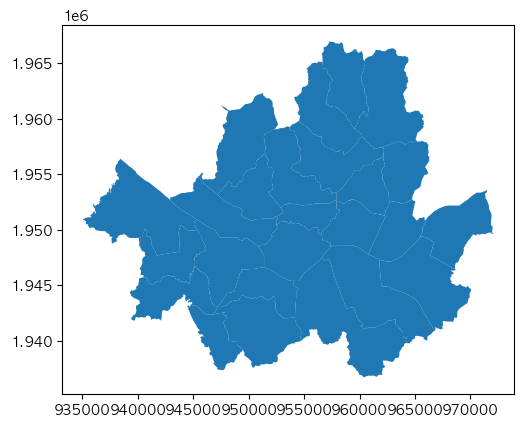

In [4]:
boundary = gp.read_file('/Users/chaewon/Downloads/LARD_ADM_SECT_SGG_ìì¸/LARD_ADM_SECT_SGG_11.shp', encoding = 'cp949')
boundary.plot()

In [5]:
boundary

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,None,11740,125,"POLYGON ((971595.075 1952405.815, 971596.036 1..."
1,11710,송파구,None,11710,126,"POLYGON ((965821.957 1949386.153, 965816.737 1..."
2,11680,강남구,None,11680,127,"POLYGON ((959331.597 1948602.068, 959342.021 1..."
3,11650,서초구,None,11650,128,"POLYGON ((956982.039 1947144.037, 956982.518 1..."
4,11620,관악구,None,11620,129,"POLYGON ((949438.997 1944127.713, 949456.647 1..."
5,11590,동작구,None,11590,130,"POLYGON ((951811.770 1946444.671, 951885.519 1..."
6,11560,영등포구,None,11560,131,"POLYGON ((945280.001 1950949.319, 945361.246 1..."
7,11545,금천구,None,11545,132,"POLYGON ((944705.924 1943086.537, 944706.472 1..."
8,11530,구로구,None,11530,133,"POLYGON ((945165.294 1946679.190, 945362.702 1..."
9,11500,강서구,None,11500,134,"POLYGON ((939006.015 1955916.461, 939036.124 1..."


In [6]:
geo19 = gp.read_file('/Users/chaewon/Downloads/B408. 서울시 자전거 편의시설 공간데이터/2. 파일데이터/2019/TL_BCYCL_INFR_ST_2019.shp')
geo19.head()

,ID,TGRP_CODE,ADDR_KOR,GPS_X,GPS_Y,TM_X,TM_Y,geometry
0,1.0,2,서울특별시 마포구 동교로8길 58,126.9058,37.5496,191671.765816,550008.949706,POINT (191671.766 550008.950)
1,2.0,2,서울특별시 마포구 월드컵로 72,126.9105,37.5560,192087.771450,550723.195890,POINT (192087.771 550723.196)
2,3.0,2,서울특별시 마포구 월드컵로 79,126.9108,37.5550,192121.325941,550606.737354,POINT (192121.326 550606.737)
3,4.0,2,서울특별시 마포구 양화로 59,126.9150,37.5506,192487.677109,550126.707129,POINT (192487.677 550126.707)
4,5.0,2,서울특별시 마포구 양화로 48,126.9148,37.5500,192473.387681,550057.685460,POINT (192473.388 550057.685)


## 2019년 자전거 편의시설 통계

In [7]:
#boundary와 geo19 좌표계 달라서
print(boundary.crs)
print(geo19.crs)

EPSG:5179
PROJCS["PCS_ITRF2000_TM_1",GEOGCS["ITRF2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [8]:
#통일시키기
geo19 = geo19.to_crs(epsg = 5179)

<Axes: title={'center': '2019년 서울시 자전거 편의시설 통계'}>

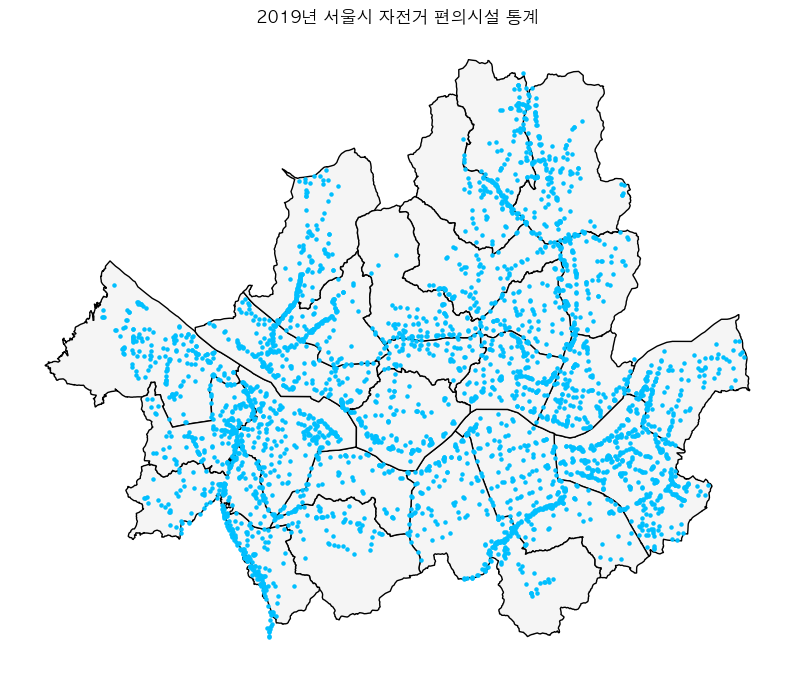

In [9]:
# 19년 자전거 편의시설 : 튀는 점 보임 
ax = boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
plt.title('2019년 서울시 자전거 편의시설 통계')
geo19.plot(ax=ax, color='deepskyblue', markersize=5)

In [10]:
geo19.isnull().sum()

ID            0
TGRP_CODE     0
ADDR_KOR     65
GPS_X         0
GPS_Y         0
TM_X          0
TM_Y          0
geometry      0
dtype: int64

In [11]:
#주소 정보가 없는 곳 존재 확인
geo19null = geo19[geo19['ADDR_KOR'].isnull()]

<Axes: title={'center': '2019년 서울시 자전거 편의시설 null값 위치'}>

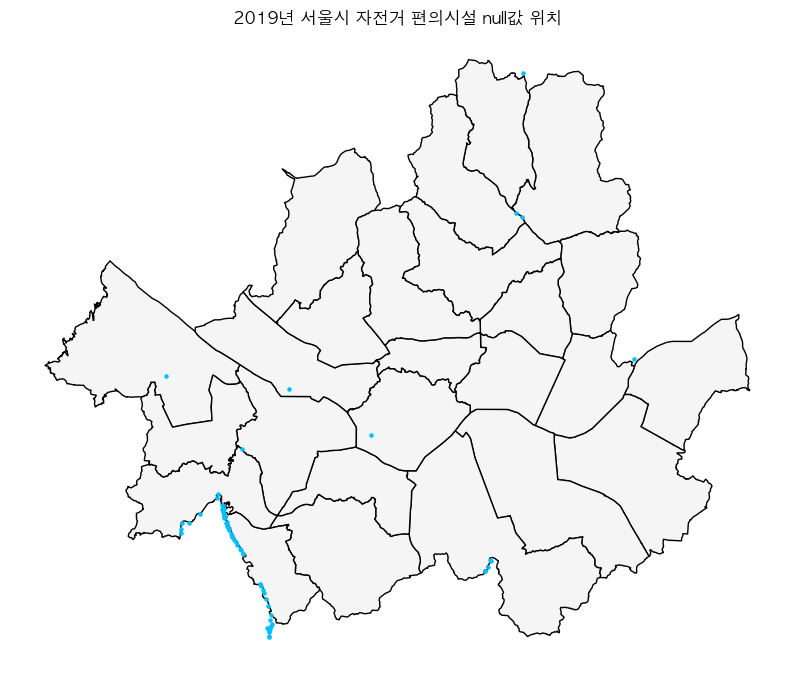

In [12]:
#아마 튀는 점들이 주소 Null일 것으로 예상
ax = boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
plt.title('2019년 서울시 자전거 편의시설 null값 위치')
geo19null.plot(ax=ax, color='deepskyblue', markersize=5)

In [13]:
#주소 정보 없는 애들 제거하고 plot
geo19 = geo19.dropna()

<Axes: title={'center': '2019년 서울시 자전거 편의시설 통계'}>

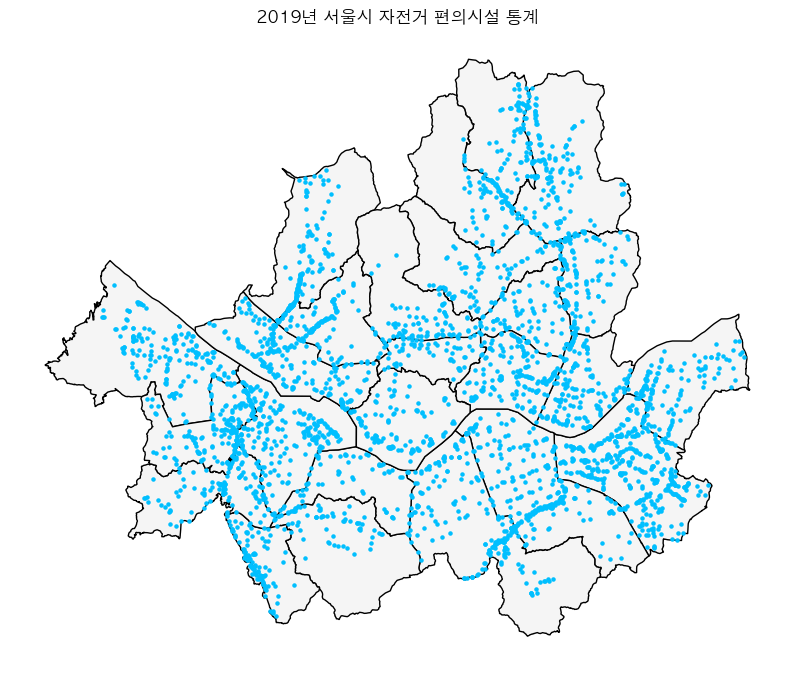

In [14]:
ax = boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
plt.title('2019년 서울시 자전거 편의시설 통계')
geo19.plot(ax=ax, color='deepskyblue', markersize=5)

In [15]:
gulist = boundary['SGG_NM'].unique()

In [16]:
gulist

array(['강동구', '송파구', '강남구', '서초구', '관악구', '동작구', '영등포구', '금천구', '구로구',
       '강서구', '양천구', '마포구', '서대문구', '은평구', '노원구', '도봉구', '강북구', '성북구',
       '중랑구', '동대문구', '광진구', '성동구', '용산구', '중구', '종로구'], dtype=object)

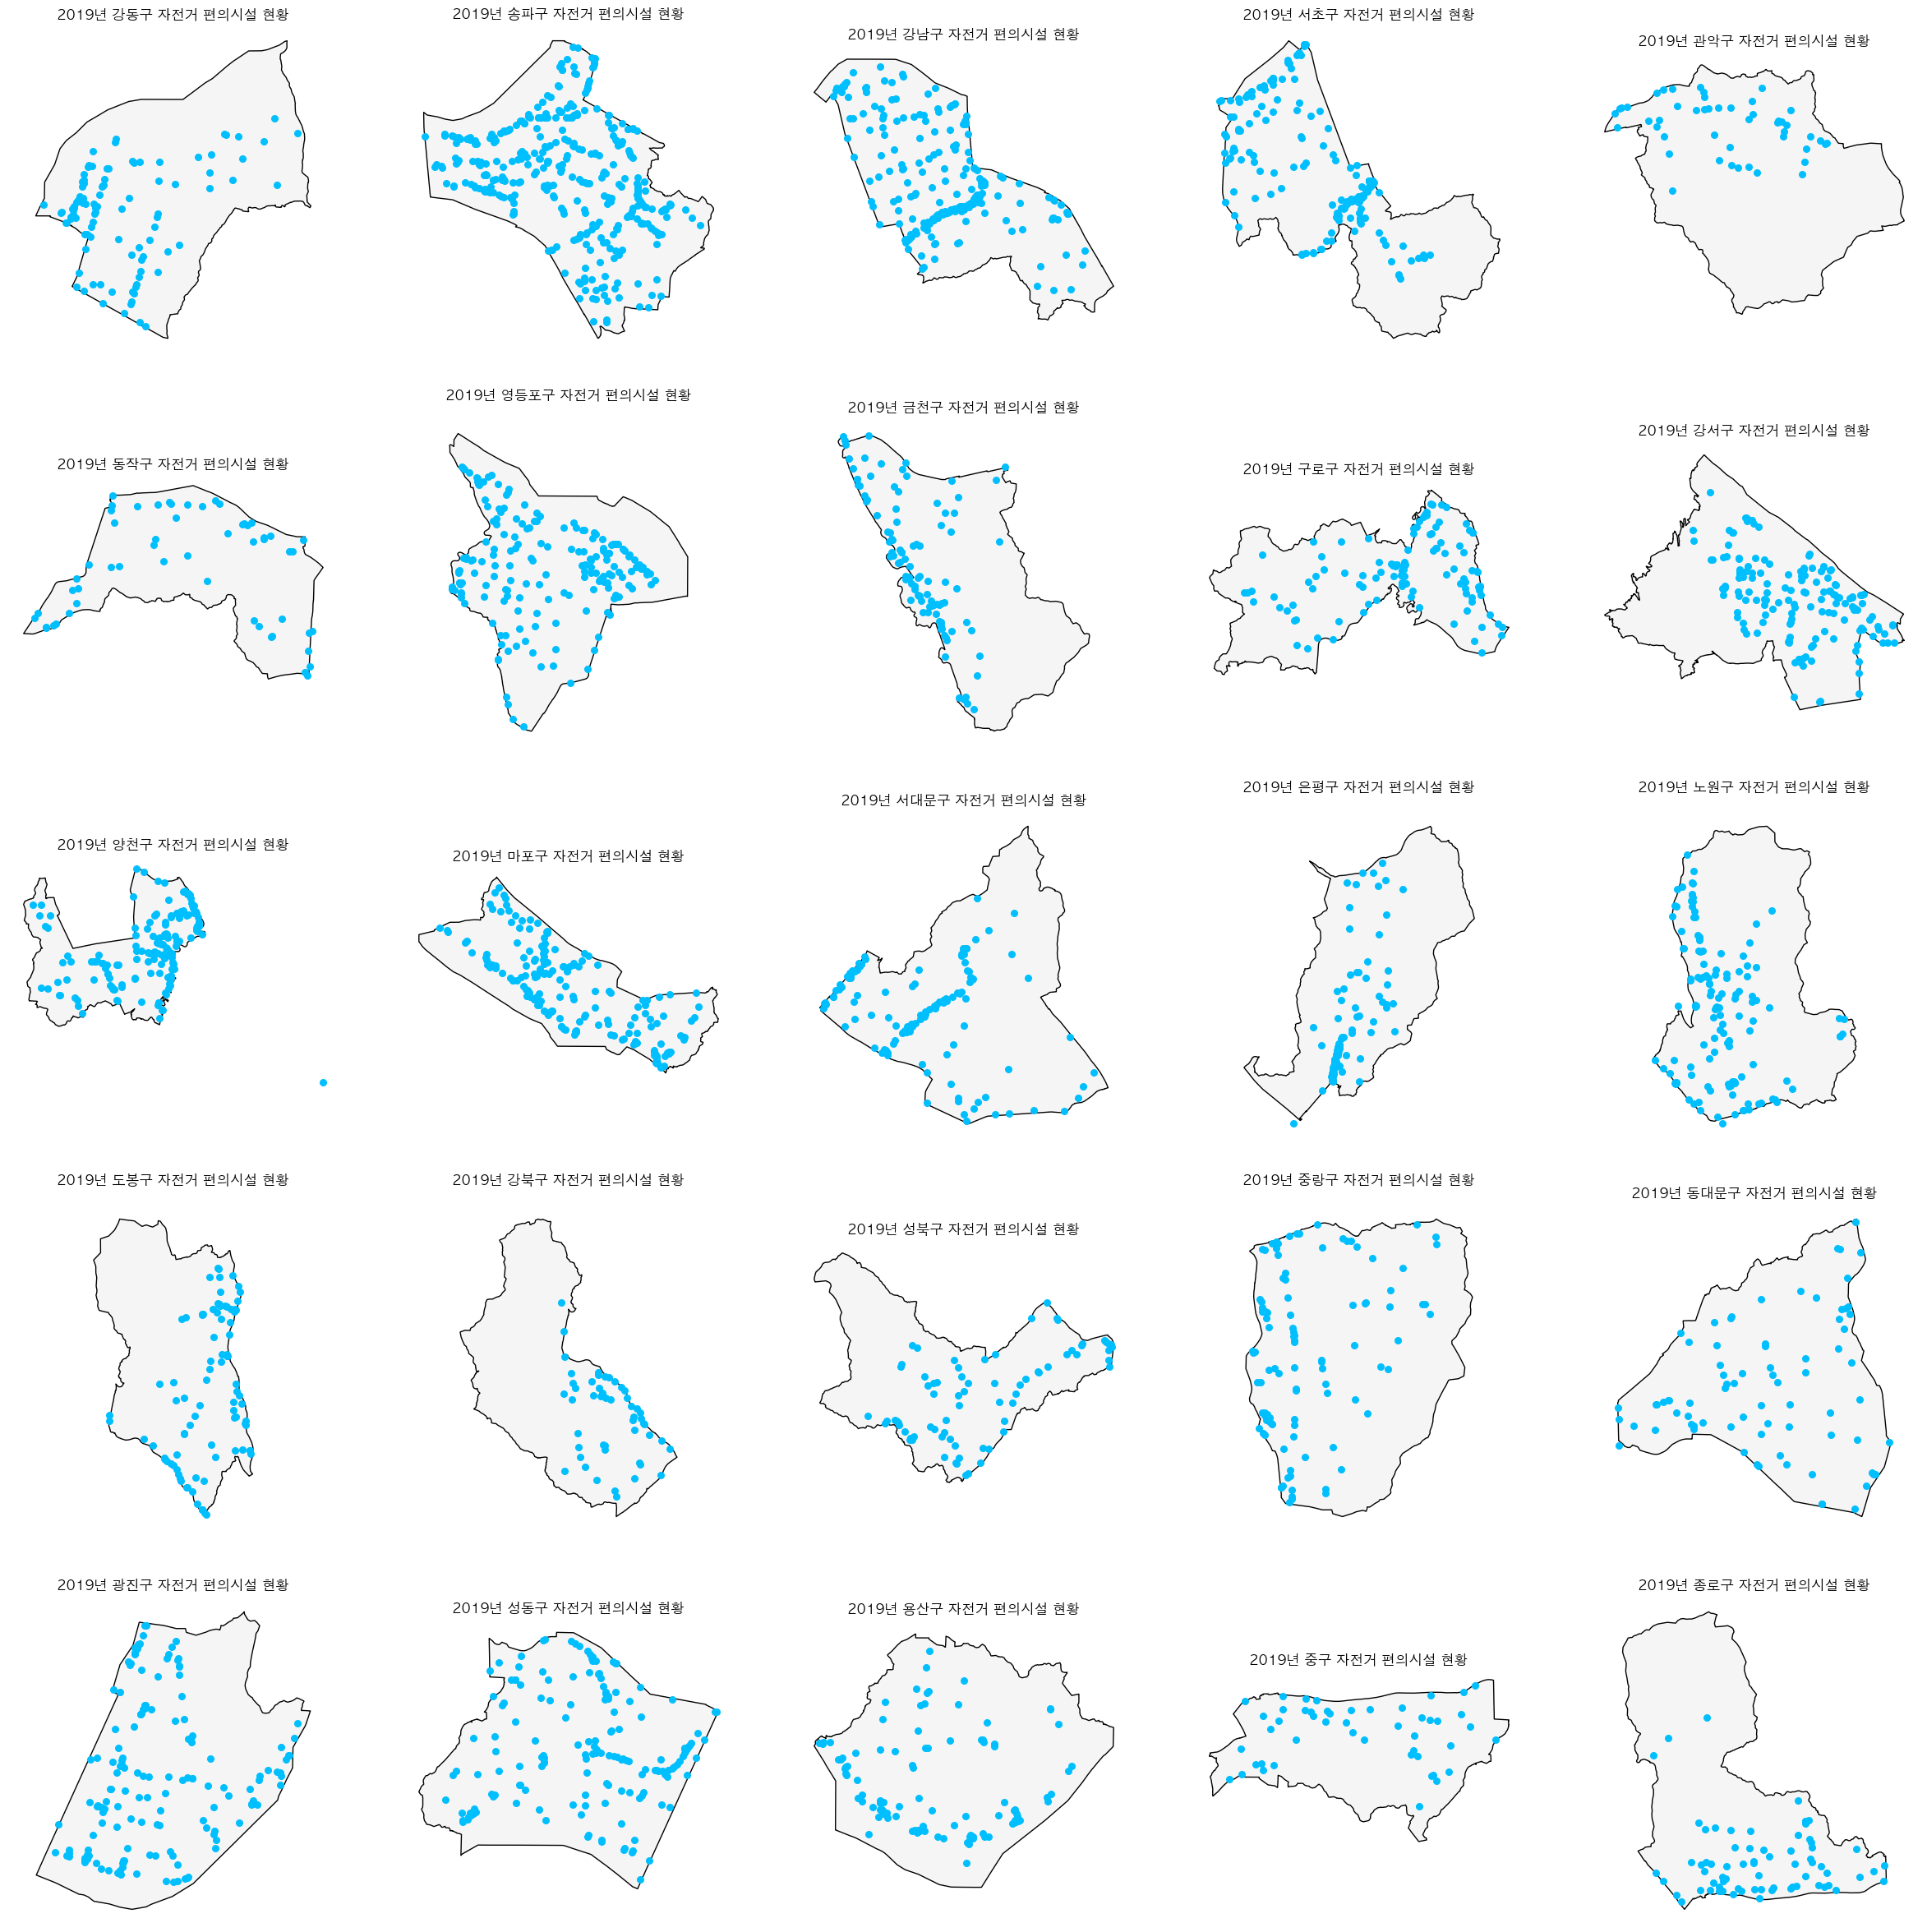

In [17]:
#구별 자전거 편의시설 현황 출력 : 양천구에 튀는 점 보임
j = 1
plt.figure(figsize = (30,30))
for i in gulist:
    gu_boundary = boundary[boundary['SGG_NM'] == i]
    gu_geo = geo19[geo19['ADDR_KOR'].str.contains(i)]
    ax = plt.subplot(5,5,j)
    gu_boundary.plot(figsize=(5,5), color='whitesmoke', edgecolor='black', linewidth=1,ax = ax)
    ax.axis('off')
    gu_geo.plot(ax=ax, color='deepskyblue', markersize=30)
    plt.title("2019년 " + i +' 자전거 편의시설 현황')
    j = j+1
plt.show()


In [18]:
#양천구 튀는 점 어떻게 찾아서 없앨지 고민
yangcheon_geo = geo19[geo19['ADDR_KOR'].str.contains('양천구')]
yangcheon_geo

,ID,TGRP_CODE,ADDR_KOR,GPS_X,GPS_Y,TM_X,TM_Y,geometry
455,456.0,2,서울특별시 양천구 목동 559,126.8728,37.5468,188756.837590,549711.272221,POINT (944593.639 1949908.605)
456,457.0,2,서울특별시 양천구 목동 813,126.8639,37.5328,187973.212326,548153.541720,POINT (943802.029 1948355.628)
457,458.0,2,서울특별시 양천구 목동 904-3,126.8687,37.5325,188397.340350,548124.082042,POINT (944225.841 1948323.925)
458,459.0,2,서울특별시 양천구 목동 451,126.8756,37.5241,189001.635464,547182.083729,POINT (944824.901 1947379.071)
459,460.0,2,서울특별시 양천구 신정동 1095,126.8649,37.5233,188057.955659,547093.596335,POINT (943881.108 1947295.631)
...,...,...,...,...,...,...,...,...
3452,1912.0,13,서울특별시 양천구 목동 900-10,3.7533,1.2688,190082.259590,548217.661820,POINT (945910.620 1948408.514)
3453,1913.0,13,서울특별시 양천구 신정동 871-17,3.7510,1.2687,188786.073340,545637.401140,POINT (944601.214 1945836.118)
3467,1927.0,13,서울특별시 양천구 목동 900-10,3.7538,1.2688,189940.184600,548829.066500,POINT (945771.848 1949020.442)
3481,1941.0,13,서울특별시 양천구 목동 409-402,3.7524,1.2687,189237.060970,547255.253370,POINT (945060.627 1947450.962)


### 열린 데이터 광장 -  자전거 편의시설 현황

#### 데이터 전처리

In [19]:
bike = pd.read_csv('/Users/chaewon/Desktop/서울빅캠/data/자전거 편의시설 현황.csv', encoding = 'cp949')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   순서          2992 non-null   int64  
 1   시설ID        2992 non-null   object 
 2   컨텐츠 명       2992 non-null   object 
 3   사용유무        2992 non-null   object 
 4   테마 타입       2992 non-null   object 
 5   x 좌표        2992 non-null   float64
 6   y 좌표        2992 non-null   float64
 7   좌표 배열       2992 non-null   object 
 8   좌표타입        2990 non-null   object 
 9   메인 이미지      110 non-null    object 
 10  새 주소        2857 non-null   object 
 11  구 주소        2969 non-null   object 
 12  우편번호        2857 non-null   float64
 13  국가 지점 번호    1223 non-null   object 
 14  테마 명        2992 non-null   object 
 15  거리          2992 non-null   float64
 16  업데이트 일      2992 non-null   object 
 17  등록일         2992 non-null   object 
 18  이미지 URL1    110 non-null    object 
 19  이미지 URL2    1 non-null     

In [20]:
#이상한 컬럼 제거
bike = bike[['시설ID','컨텐츠 명','x 좌표','y 좌표','새 주소','우편번호','등록일']]
bike

,시설ID,컨텐츠 명,x 좌표,y 좌표,새 주소,우편번호,등록일
0,공덕전철역 2번출구,자전거 일반거치대,126.950520,37.544413,서울특별시 마포구 마포대로 109,4146.0,2022-01-18 10:36:34
1,동대문구_자전거보관대_120,_자전거보관대,127.066702,37.588619,서울특별시 동대문구 망우로 82,2500.0,2022-01-11 10:58:17
2,강동구_수리센터_001,강동구자전거종합서비스센터,127.156898,37.555645,서울특별시 강동구 동남로 918,5225.0,2021-12-28 17:32:00
3,한강_수리센터_003,강서 자전거 대여소 수리센터,126.821933,37.584380,NaN,NaN,2022-01-25 11:23:38
4,구로구_자전거주차장_002,개봉역 자전거주차장,126.859377,37.495407,서울특별시 구로구 경인로40길 25,8276.0,2022-03-14 15:48:53
...,...,...,...,...,...,...,...
2987,용산구 거치대 관공서-03,효창종합사회복지관 자전거보관소,126.963026,37.541266,서울특별시 용산구 효창원로 146-12,4317.0,2022-02-07 13:09:51
2988,용산구 공기주입기 - 031,후암동버스종점 공기주입기,126.981205,37.546603,서울특별시 용산구 두텁바위로 74,4353.0,2022-02-07 11:15:31
2989,용산구 거치대 정류소-04,후암동버스종점 자전거보관소,126.981199,37.546589,서울특별시 용산구 두텁바위로 74,4353.0,2021-12-24 14:53:33
2990,용산구 공기주입기 - 046,후암시장삼거리 공기주입기,126.977171,37.550339,서울특별시 용산구 후암로 51,4325.0,2022-02-07 13:23:26


In [61]:
bike.isnull().sum()

시설ID       0
컨텐츠 명      0
x 좌표       0
y 좌표       0
새 주소     135
우편번호     135
등록일        0
dtype: int64

In [62]:
#주소와 우편번호 null값 존재 확인 -> 어떻게 할지 고민 .. 컨텐츠 명과 시설ID로 분할구를 찾아보려 했으나 다 나온게 아니라 그냥 버릴까요
bikenull = bike[bike['새 주소'].isnull()]
bikenull

,시설ID,컨텐츠 명,x 좌표,y 좌표,새 주소,우편번호,등록일
3,한강_수리센터_003,강서 자전거 대여소 수리센터,126.821933,37.584380,NaN,NaN,2022-01-25 11:23:38
6,11103419_1679633022222,경춘선숲길(화랑대철도공원)_공기주입기,127.090819,37.623396,NaN,NaN,2023-03-24 13:44:26
48,중랑구_공기주입기_11,공기주입기,127.077558,37.574884,NaN,NaN,2022-03-14 11:06:56
68,11103419_1646270769824,공기주입기,127.038933,37.632882,NaN,NaN,2022-03-03 10:27:16
96,중랑구_공기주입기_16,공기주입기,127.103513,37.613395,NaN,NaN,2022-03-14 11:10:36
...,...,...,...,...,...,...,...
2934,11103419_1679554931303,중랑천변 월릉교 하단_공기주입기,127.071953,37.616122,NaN,NaN,2023-03-23 16:03:20
2935,11103419_1679640958847,중랑천변(상계11~16단지 하단)_공기주입기,127.050026,37.667187,NaN,NaN,2023-03-24 15:56:13
2956,한강_수리센터_001,한강자전거공방,127.001376,37.512019,NaN,NaN,2022-01-25 11:02:57
2972,노원구_공기주입기_019,한천교하단_공기주입기,127.068592,37.624743,NaN,NaN,2022-01-10 10:34:49


In [21]:
#열린데이터광장 데이터는 2021 - 2023에 등록된 편의시설 존재
bike['등록일'] = pd.to_datetime(bike['등록일'])
bike['등록일'].dt.year.unique()

array([2022, 2021, 2023], dtype=int32)

In [22]:
#연도별로 데이터 분할 후 bike21, bike22, bike23 df생성
bike21 = bike[bike['등록일'].dt.year == 2021]
bike21.head()

,시설ID,컨텐츠 명,x 좌표,y 좌표,새 주소,우편번호,등록일
2,강동구_수리센터_001,강동구자전거종합서비스센터,127.156898,37.555645,서울특별시 강동구 동남로 918,5225.0,2021-12-28 17:32:00
9,용산구 거치대 관공서-05,고려에이트리움 앞 자전거보관소,126.972730,37.541515,서울특별시 용산구 한강대로 259,4322.0,2021-12-24 14:54:19
42,공기주입기(창4동주민센터),공기주입기,127.051595,37.652310,서울특별시 도봉구 노해로 390,1418.0,2021-12-28 14:00:36
132,용산구 거치대 지하철-23,녹사평역 4번 출구 자전거보관소,126.986058,37.534744,NaN,NaN,2021-12-24 14:22:23
135,공기주입기(SBS앞 공원),공기주입기(SBS앞 공원),126.894231,37.579430,서울특별시 마포구 성암로 229-1,3927.0,2021-12-16 10:49:28


In [23]:
bike22 = bike[bike['등록일'].dt.year == 2022]
bike22.head()

,시설ID,컨텐츠 명,x 좌표,y 좌표,새 주소,우편번호,등록일
0,공덕전철역 2번출구,자전거 일반거치대,126.950520,37.544413,서울특별시 마포구 마포대로 109,4146.0,2022-01-18 10:36:34
1,동대문구_자전거보관대_120,_자전거보관대,127.066702,37.588619,서울특별시 동대문구 망우로 82,2500.0,2022-01-11 10:58:17
3,한강_수리센터_003,강서 자전거 대여소 수리센터,126.821933,37.584380,NaN,NaN,2022-01-25 11:23:38
4,구로구_자전거주차장_002,개봉역 자전거주차장,126.859377,37.495407,서울특별시 구로구 경인로40길 25,8276.0,2022-03-14 15:48:53
5,강서구_주차장001,개화역 자전거 주차장,126.797933,37.577463,서울특별시 강서구 개화동로8길 19,7505.0,2022-03-15 17:22:01


In [24]:
bike23 = bike[bike['등록일'].dt.year == 2023]
bike23.head()

,시설ID,컨텐츠 명,x 좌표,y 좌표,새 주소,우편번호,등록일
6,11103419_1679633022222,경춘선숲길(화랑대철도공원)_공기주입기,127.090819,37.623396,NaN,NaN,2023-03-24 13:44:26
7,11103419_1679634009449,경춘선숲길공원 방문자센터_공기주입기,127.070420,37.631442,서울특별시 노원구 동일로 1127,1851.0,2023-03-24 14:01:19
8,11103419_1681359597379,경춘선숲길공원(공릉역 근처)_공기주입기,127.076601,37.627199,서울특별시 노원구 동일로192길 77,1833.0,2023-04-13 13:24:00
10,11103419_1679633600955,골마을근린공원_공기주입기,127.074944,37.638794,서울특별시 노원구 노원로 236,1750.0,2023-03-24 13:54:43
34,서대문구_태양광 자동 공기주입기_002,공기주입기,126.916496,37.576232,서울특별시 서대문구 거북골로 100,3689.0,2023-03-17 17:51:02


In [27]:
#21년 위도 경도 좌표계 -> epsg 좌표계 변환 및 shp 파일로 저장

# 위도 경도 데이터를 DataFrame으로부터 가져옵니다.
bike_y = bike21['x 좌표']  # 경도
bike_x = bike21['y 좌표']  # 위도

# WGS84 좌표계 (EPSG:4326)와 EPSG:5179 좌표계 정의
wgs84 = Proj(proj='latlong', datum='WGS84')
korean_grid = Proj(init='epsg:5179')

# 좌표 변환 함수 정의
def convert_coordinates(lon, lat):
    x, y = transform(wgs84, korean_grid, lon, lat)
    return x, y

# 위도 경도를 EPSG:5179로 변환하여 geometry 열에 저장합니다.
geometry = [Point(convert_coordinates(lon, lat)) for lon, lat in zip(bike_y, bike_x)]
gdf = gp.GeoDataFrame(geometry=geometry, crs='epsg:5179')

# shp 파일로 저장합니다.
gdf.to_file('bike21_data.shp')

/Users/chaewon/miniconda3/envs/torch/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/h5/mq1l1zwx7c9gymlzc90v0pnm0000gn/T/ipykernel_85408/2544848977.py:13: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(wgs84, korean_grid, lon, lat)


In [29]:
#22년 위도 경도 좌표계 -> epsg 좌표계 변환 및 shp 파일로 저장

# 위도 경도 데이터를 DataFrame으로부터 가져옵니다.
bike_y = bike22['x 좌표']  # 경도
bike_x = bike22['y 좌표']  # 위도
#bike_ad = bike['새 주소']

# WGS84 좌표계 (EPSG:4326)와 EPSG:5179 좌표계 정의
wgs84 = Proj(proj='latlong', datum='WGS84')
korean_grid = Proj(init='epsg:5179')

# 좌표 변환 함수 정의
def convert_coordinates(lon, lat):
    x, y = transform(wgs84, korean_grid, lon, lat)
    return x, y

# 위도 경도를 EPSG:5179로 변환하여 geometry 열에 저장합니다.
geometry = [Point(convert_coordinates(lon, lat)) for lon, lat in zip(bike_y, bike_x)]
gdf = gp.GeoDataFrame(geometry=geometry, crs='epsg:5179')

# shp 파일로 저장합니다.
gdf.to_file('bike22_data.shp')

/Users/chaewon/miniconda3/envs/torch/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/h5/mq1l1zwx7c9gymlzc90v0pnm0000gn/T/ipykernel_85408/1777185006.py:14: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(wgs84, korean_grid, lon, lat)


In [30]:
#23년 위도 경도 좌표계 -> epsg 좌표계 변환 및 shp 파일로 저장

# 위도 경도 데이터를 DataFrame으로부터 가져옵니다.
bike_y = bike23['x 좌표']  # 경도
bike_x = bike23['y 좌표']  # 위도
#bike_ad = bike['새 주소']

# WGS84 좌표계 (EPSG:4326)와 EPSG:5179 좌표계 정의
wgs84 = Proj(proj='latlong', datum='WGS84')
korean_grid = Proj(init='epsg:5179')

# 좌표 변환 함수 정의
def convert_coordinates(lon, lat):
    x, y = transform(wgs84, korean_grid, lon, lat)
    return x, y

# 위도 경도를 EPSG:5179로 변환하여 geometry 열에 저장합니다.
geometry = [Point(convert_coordinates(lon, lat)) for lon, lat in zip(bike_y, bike_x)]
gdf = gp.GeoDataFrame(geometry=geometry, crs='epsg:5179')

# shp 파일로 저장합니다.
gdf.to_file('bike23_data.shp')

/Users/chaewon/miniconda3/envs/torch/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/h5/mq1l1zwx7c9gymlzc90v0pnm0000gn/T/ipykernel_85408/1723930616.py:14: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(wgs84, korean_grid, lon, lat)


In [36]:
#epsg 좌표계로 변환한 데이터 확인
bike_data21 = gp.read_file('/Users/chaewon/Desktop/서울빅캠/bigdata_campus-1/Bicycle/bike21_data.shp')
bike_data21.head()

,FID,geometry
0,0,POINT (969695.666 1950755.113)
1,1,POINT (953420.250 1949262.750)
2,2,POINT (960446.000 1961518.750)
3,3,POINT (954593.500 1948505.000)
4,4,POINT (946512.500 1953511.000)


In [37]:
bike_data22 = gp.read_file('/Users/chaewon/Desktop/서울빅캠/bigdata_campus-1/Bicycle/bike22_data.shp')
bike_data22.head()

,FID,geometry
0,0,POINT (951460.000 1949595.500)
1,1,POINT (961746.000 1954446.279)
2,2,POINT (940132.750 1954103.750)
3,3,POINT (943371.500 1944209.500)
4,4,POINT (938008.000 1953352.000)


In [38]:
bike_data23 = gp.read_file('/Users/chaewon/Desktop/서울빅캠/bigdata_campus-1/Bicycle/bike23_data.shp')
bike_data23.head()

,FID,geometry
0,0,POINT (963892.000 1958295.000)
1,1,POINT (962096.000 1959195.750)
2,2,POINT (962639.250 1958722.500)
3,3,POINT (962498.875 1960009.625)
4,4,POINT (948476.250 1953143.750)


In [39]:
#이상한 epsg 좌표계에서 boundary 지도와 같은 epsg 5179로 변환
print(bike_data21.crs)
bike21_data = bike_data21.to_crs(epsg = 5179)

print(bike_data22.crs)
bike22_data = bike_data22.to_crs(epsg = 5179)

print(bike_data23.crs)
bike23_data = bike_data23.to_crs(epsg = 5179)

PROJCS["KGD2002_Unified_CS",GEOGCS["GCS_KGD2002",DATUM["D_Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["KGD2002_Unified_CS",GEOGCS["GCS_KGD2002",DATUM["D_Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Nort

#### 연도별 등록 시설 boundary 지도에 시각화

<Axes: title={'center': '2021년 등록 서울시 자전거 편의시설 통계'}>

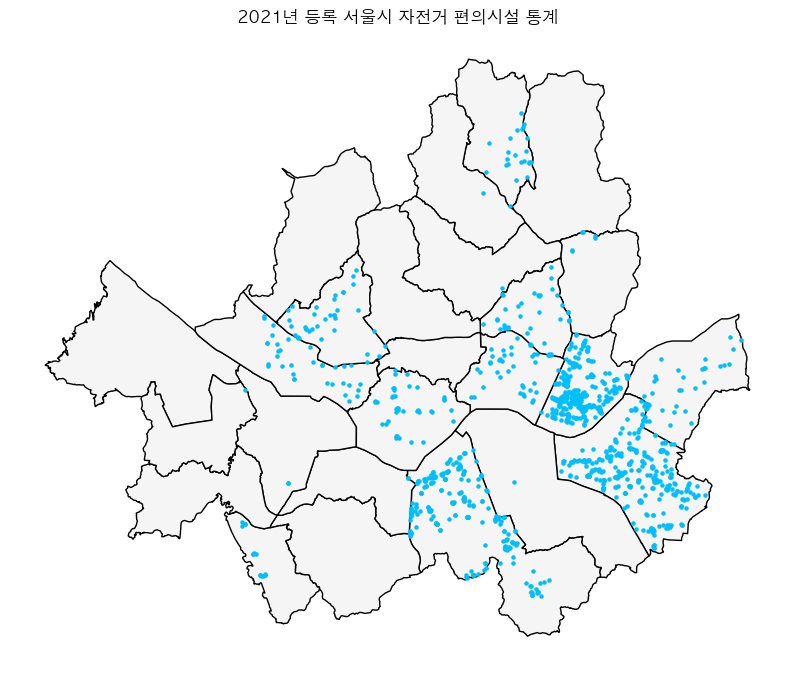

In [41]:
ax = boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
plt.title('2021년 등록 서울시 자전거 편의시설 통계')
bike21_data.plot(ax=ax, color='deepskyblue', markersize=5)

<Axes: title={'center': '2022년 등록 서울시 자전거 편의시설 통계'}>

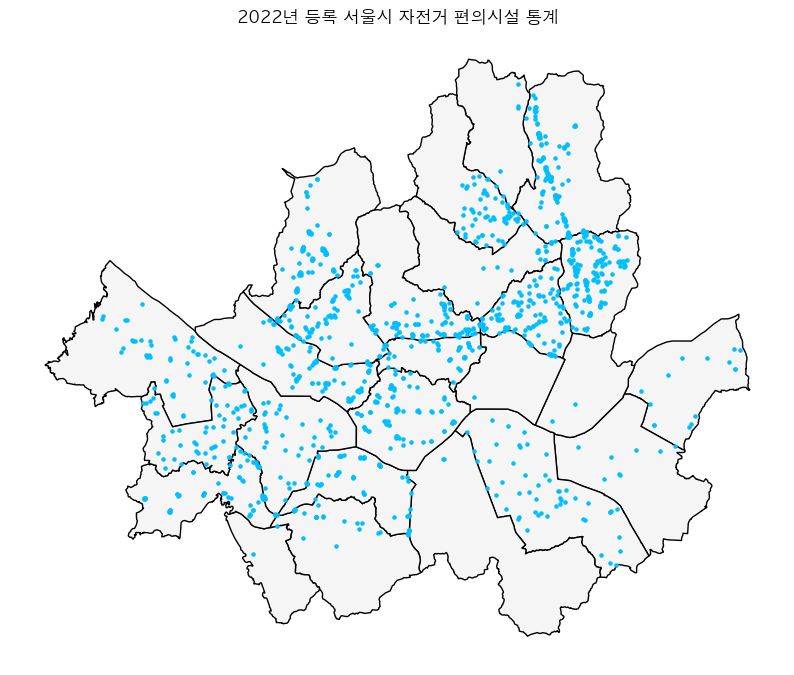

In [42]:
ax = boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
plt.title('2022년 등록 서울시 자전거 편의시설 통계')
bike22_data.plot(ax=ax, color='deepskyblue', markersize=5)

<Axes: title={'center': '2023년 등록 서울시 자전거 편의시설 통계'}>

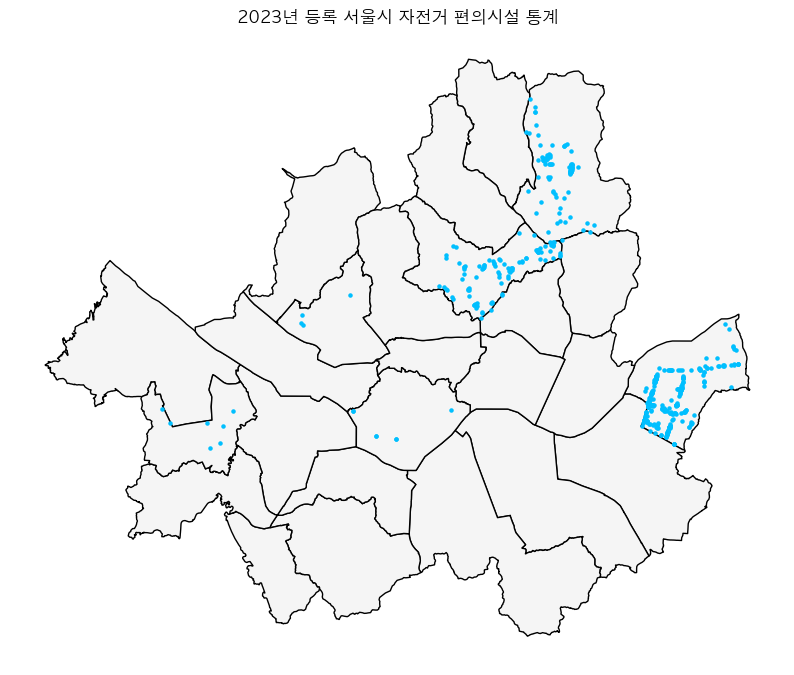

In [43]:
ax = boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
plt.title('2023년 등록 서울시 자전거 편의시설 통계')
bike23_data.plot(ax=ax, color='deepskyblue', markersize=5)

### 빅데이터 캠퍼스, 열린 데이터 광장 합쳐서 시각화

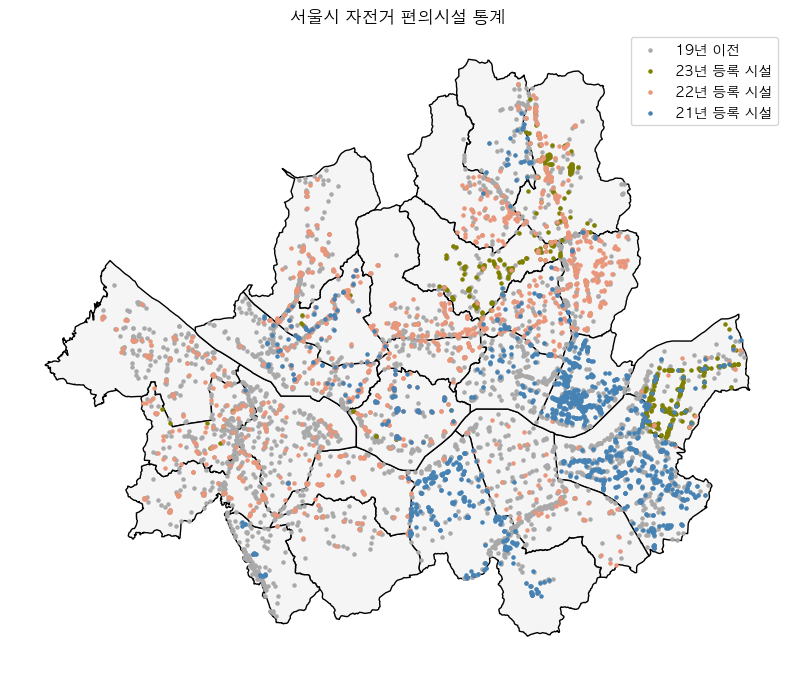

In [60]:
ax = boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
plt.title('서울시 자전거 편의시설 통계')
geo19.plot(ax=ax, color='darkgray', markersize=5, label = '19년 이전')
bike23_data.plot(ax=ax, color='olive', markersize=5, label = '23년 등록 시설')
bike22_data.plot(ax=ax, color='darksalmon', markersize=5, label = '22년 등록 시설')
bike21_data.plot(ax=ax, color='steelblue', markersize=5, label = '21년 등록 시설')
ax.axis('off')
plt.legend()
plt.show()